In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from posydon.grids.psygrid import PSyGrid
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("/projects/b1119/eteng/psygrid_dataset")

In [3]:
train = PSyGrid("post_processed_grid_combined_with_rerun_2.h5")

In [4]:
pd.DataFrame(train[28]["final_profile1"])

,radius,mass,logRho,omega,energy,x_mass_fraction_H,y_mass_fraction_He,z_mass_fraction_metals,neutral_fraction_H,neutral_fraction_He,avg_charge_He
0,1.394370,21.759441,-7.584641,0.0,1.267084e+14,2.000000e-99,0.98580,0.01420,-6.852624e-14,-7.664673e-12,2.000000
1,1.374431,21.759441,-5.782990,0.0,3.079626e+14,2.000000e-99,0.98580,0.01420,5.241192e-18,7.283732e-16,2.000000
2,1.366051,21.759441,-5.059857,0.0,3.008679e+14,2.000000e-99,0.98580,0.01420,8.971852e-19,-2.250221e-17,2.000000
3,1.353273,21.759440,-4.323309,0.0,4.194922e+14,2.000000e-99,0.98580,0.01420,1.139304e-16,2.330263e-19,2.000000
4,1.327279,21.759425,-3.512584,0.0,7.939675e+14,2.000000e-99,0.98580,0.01420,2.942173e-14,-2.495223e-21,2.000000
...,...,...,...,...,...,...,...,...,...,...,...
310,0.105819,0.285217,2.517199,0.0,5.102098e+16,1.000000e-99,0.97792,0.02208,4.060997e-03,0.000000e+00,1.995939
311,0.092711,0.193930,2.526117,0.0,5.149326e+16,1.000000e-99,0.97792,0.02208,4.061620e-03,0.000000e+00,1.995938
312,0.080253,0.126940,2.532669,0.0,5.184203e+16,1.000000e-99,0.97792,0.02208,4.062091e-03,0.000000e+00,1.995938
313,0.065526,0.069729,2.539868,0.0,5.222862e+16,1.000000e-99,0.97792,0.02208,4.062615e-03,0.000000e+00,1.995937


In [5]:
def scrape(arr,i):
    a = pd.DataFrame(arr[i]['final_profile1'])
    a = a.sort_values(by="mass")
    a = a.reset_index(drop=True)
    
    m1 = arr.initial_values["star_1_mass"][i]
    m2 = arr.initial_values["star_2_mass"][i]
    p = arr.initial_values["period_days"][i]
    final_mass = np.max(a["mass"])

    f = interp1d(a["mass"]/final_mass,a["logRho"],fill_value="extrapolate")
    m_new = np.linspace(0,1,200)
    logrho_new = f(m_new)
    min_logrho = np.min(logrho_new)
    max_logrho = np.max(logrho_new)
    norm_logrho = (logrho_new-min_logrho)/(max_logrho-min_logrho)
    
    return m1,m2,p,final_mass,m_new,min_logrho,max_logrho,norm_logrho

In [7]:
def make_dict(arr,i):
    m1,m2,p,final_mass,m_new,min_logrho,max_logrho,norm_logrho = scrape(arr,i)
    model_dict = {
        "m1":m1,
        "m2":m2,
        "p":p,
        "final_mass":final_mass,
        "m_arr":m_new,
        "min_logrho":min_logrho,
        "max_logrho":max_logrho,
        "logrho_arr":norm_logrho
    }
    return model_dict

In [7]:
training = []
failed = []
for i in range(len(train)):
    try:
        training.append(make_dict(train,i))
    except:
        failed.append(i)
        pass

In [9]:
print(len(failed))
print(training[1])

1214
{'m1': 9.973225416172864, 'm2': 1.0, 'p': 3.774783644270196, 'final_mass': 7.101773697295249, 'm_arr': array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
       0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
       0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
       0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
       0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
       0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
       0.32663317, 0.

In [8]:
plt.figure(figsize=(10,7))
for i in range(10000):
    plt.plot(training[i]['m_arr'],training[i]['logrho_arr']*(training[i]["max_logrho"]-training[i]["min_logrho"])+training[i]['max_logrho'],alpha=.2,c='k')
plt.show()

IndexError: list index out of range

<Figure size 720x504 with 0 Axes>

/home/tem7290/.conda/envs/posydon/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  import sys


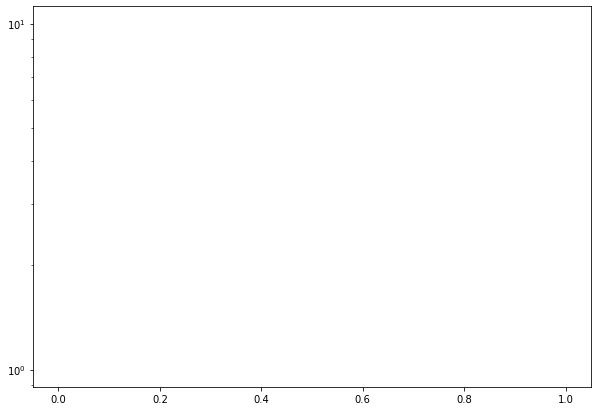

In [9]:
maxlist=[]
for i in range(len(training)):
    maxlist.append(training[i]['max_logrho'])
    
plt.figure(figsize=(10,7))
plt.hist(maxlist,bins=50)
plt.yscale("log")

plt.show()



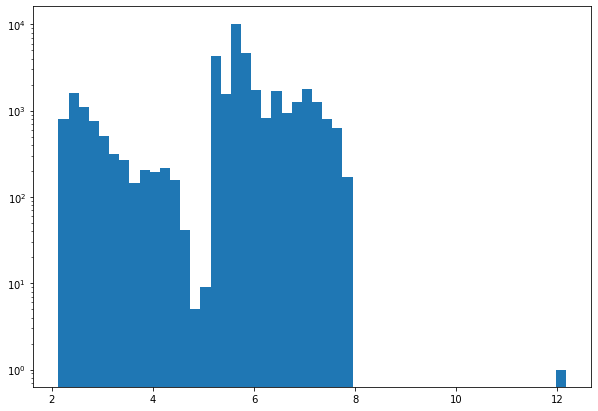

In [31]:
minlist=[]
for i in range(len(training)):
    minlist.append(training[i]['min_logrho'])
    
plt.figure(figsize=(10,7))
plt.hist(maxlist,bins=50)
plt.yscale("log")

plt.show()

In [24]:
m1list = []
for i in range(len(training)):
    m1list.append(training[i]['m1'])
plist = []
for i in range(len(training)):
    plist.append(training[i]['p'])


In [25]:
len(m1list)

38263

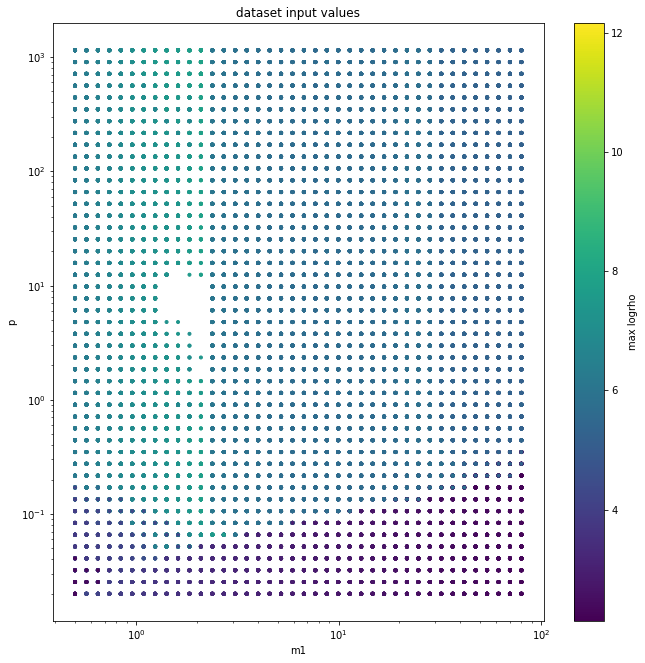

In [26]:

plt.figure(figsize=(11,11))
plt.scatter(m1list,plist,marker='.',c=maxlist)
plt.xlabel("m1")
plt.ylabel("p")
plt.title("dataset input values")
plt.yscale("log")
plt.xscale("log")
plt.colorbar(label='max logrho')
plt.show()

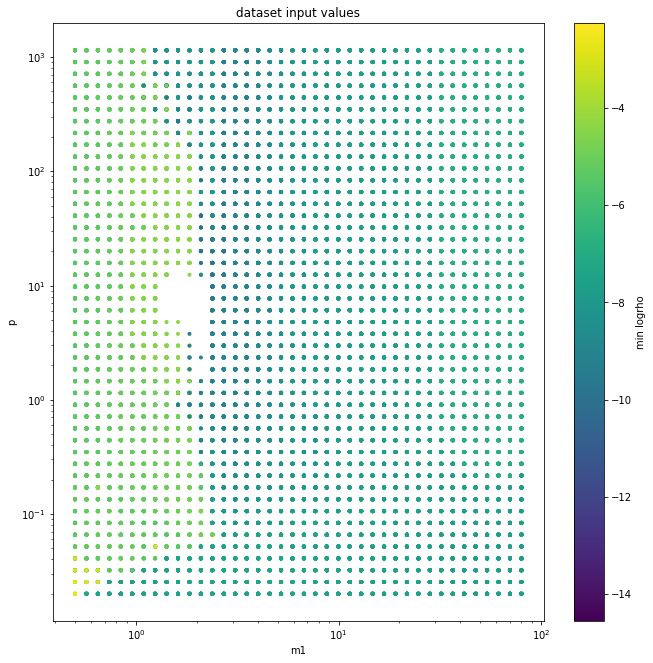

In [27]:
plt.figure(figsize=(11,11))
plt.scatter(m1list,plist,marker='.',c=minlist)
plt.xlabel("m1")
plt.ylabel("p")
plt.yscale("log")
plt.xscale("log")

plt.title("dataset input values")
plt.colorbar(label='min logrho')
plt.show()

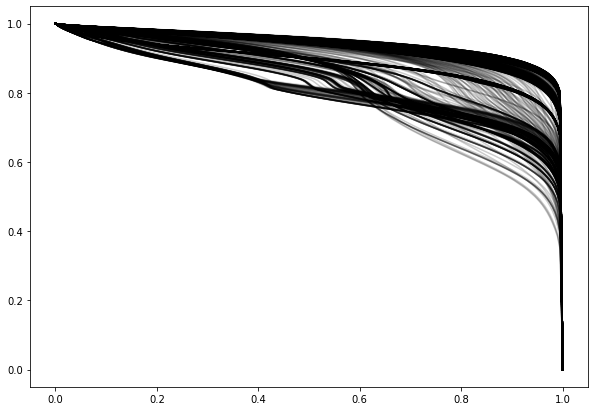

In [11]:
plt.figure(figsize=(10,7))
for i in range(1000):
    plt.plot(training[i]['m_arr'],training[i]['logrho_arr'],alpha=.2,c='k')
plt.show()

In [125]:
np.save("normalized_logrho_profiles.npy",np.array(training,dtype='object'),allow_pickle=True)
data = np.load("normalized_logrho_profiles.npy",allow_pickle=True)
data[1]

{'m1': 9.973225416172864,
 'm2': 1.0,
 'p': 3.774783644270196,
 'final_mass': 7.101773697295249,
 'm_arr': array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
        0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
        0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
        0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
        0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
        0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
        0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
        0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
        0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
        0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
        0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
        0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
        0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
        0.

In [126]:
valid = PSyGrid("post_processed_grid_random_combined_with_rerun_2.h5")

In [127]:
validation = []
failed_val = []
for i in range(len(valid)):
    try:
        validation.append(make_dict(valid,i))
    except:
        failed_val.append(i)
        pass

In [128]:
print(len(failed_val))
print(validation[1])

344
{'m1': 3.6099567262360686, 'm2': 1.4722869662656768, 'p': 1.969090642707754, 'final_mass': 3.147695403118807, 'm_arr': array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
       0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
       0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
       0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
       0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
       0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
      

In [130]:
np.save("normalized_logrho_validation_profiles.npy",np.array(validation,dtype='object'),allow_pickle=True)
data = np.load("normalized_logrho_validation_profiles.npy",allow_pickle=True)
data[1]

{'m1': 3.6099567262360686,
 'm2': 1.4722869662656768,
 'p': 1.969090642707754,
 'final_mass': 3.147695403118807,
 'm_arr': array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
        0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
        0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
        0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
        0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
        0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
        0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
        0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
        0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
        0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
        0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
        0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
        0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.3216